In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9

import pybaseball as pyb

In [5]:
lw = pd.read_csv('./logan_webb_stats.csv')
lw.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
lw['game_date'] = pd.to_datetime(lw['game_date'])

In [21]:
lw

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,events,description,zone,...,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,score_diff,score_lead,prev_pitch_type,prev_description
0,FF,2019-08-17,94.3,-1.69,5.64,"Webb, Logan",502481,NaN,ball,11.0,...,Standard,211.0,0.000,0.037,NaN,NaN,0,0,NaN,NaN
1,FF,2019-08-17,94.0,-1.65,5.74,"Webb, Logan",502481,NaN,ball,14.0,...,Standard,215.0,0.000,0.068,NaN,NaN,0,0,FF,ball
2,FF,2019-08-17,94.0,-1.73,5.75,"Webb, Logan",502481,NaN,ball,14.0,...,Standard,218.0,0.000,0.136,NaN,NaN,0,0,FF,ball
3,FF,2019-08-17,93.8,-1.74,5.74,"Webb, Logan",502481,NaN,called_strike,7.0,...,Standard,216.0,0.000,-0.078,NaN,NaN,0,0,FF,ball
4,FF,2019-08-17,93.9,-1.71,5.72,"Webb, Logan",502481,NaN,foul,4.0,...,Standard,214.0,0.000,-0.091,NaN,NaN,0,0,FF,called_strike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10326,FF,2023-09-25,91.9,-1.44,4.97,"Webb, Logan",596847,NaN,called_strike,1.0,...,Standard,236.0,0.000,-0.133,NaN,NaN,1,1,CH,called_strike
10327,FF,2023-09-25,91.2,-1.33,5.00,"Webb, Logan",596847,NaN,ball,11.0,...,Standard,245.0,0.000,0.023,NaN,NaN,1,1,FF,called_strike
10328,CH,2023-09-25,88.8,-1.38,4.89,"Webb, Logan",596847,fielders_choice_out,hit_into_play,9.0,...,Standard,264.0,0.286,-0.208,NaN,NaN,1,1,FF,ball
10329,CH,2023-09-25,87.9,-1.42,4.91,"Webb, Logan",595777,NaN,called_strike,7.0,...,Standard,266.0,0.000,-0.088,NaN,NaN,1,1,NaN,hit_into_play


In [47]:
pitch_color_map = {'4-Seam Fastball': 'red', 'Changeup': 'green', 'Cutter': 'blue', 'Sweeper': 'purple', 'Sinker': 'orange'}

### Usage of Each Pitch Type per Year

In [7]:
# percentage of pitch type per year
pitch_type_perc_per_year = lw.groupby('game_year')['pitch_name'].value_counts().unstack()

pitch_type_perc_per_year_normalized = pitch_type_perc_per_year.div(pitch_type_perc_per_year.sum(axis=1), axis=0)
pitch_type_perc_per_year_normalized

pitch_name,4-Seam Fastball,Changeup,Cutter,Sinker,Sweeper
game_year,,,,,
2019,0.434911,0.201183,NaN,0.128698,0.235207
2020,0.324623,0.306533,0.054271,0.160804,0.153769
2021,0.092908,0.246786,0.009954,0.369141,0.281211
2022,0.032269,0.311377,NaN,0.329341,0.327013
2023,0.037003,0.412889,NaN,0.336109,0.213999


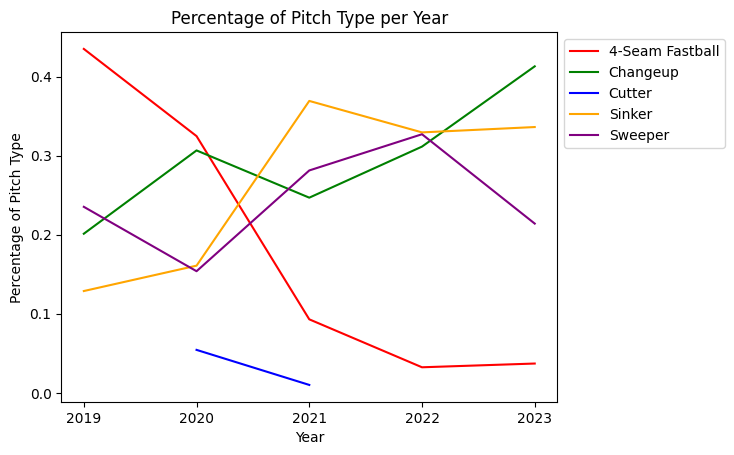

In [49]:
plt.plot(pitch_type_perc_per_year_normalized)
plt.xticks(np.arange(2019, 2024), np.arange(2019, 2024))
plt.xlabel('Year')
plt.ylabel('Percentage of Pitch Type')
plt.title('Percentage of Pitch Type per Year')
# apply color to the plot
for i, pitch in enumerate(pitch_type_perc_per_year_normalized.columns):
    plt.gca().get_lines()[i].set_color(pitch_color_map[pitch])
plt.legend(pitch_type_perc_per_year_normalized.columns, bbox_to_anchor=(1, 1))
plt.show()

### Percent of Strikes per Pitch Type per Year

In [9]:
# count of strikes per pitch, per year
strikes_per_pitch_type_per_year =  lw[lw['description'].str.contains('strike')].groupby('game_year')['pitch_name'].value_counts().unstack() / pitch_type_perc_per_year

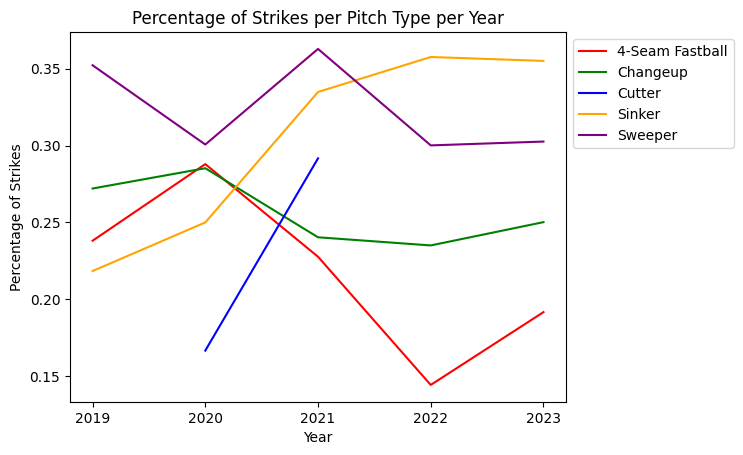

In [51]:
plt.plot(strikes_per_pitch_type_per_year)
plt.xticks(np.arange(2019, 2024), np.arange(2019, 2024))
plt.xlabel('Year')
plt.ylabel('Percentage of Strikes')
plt.title('Percentage of Strikes per Pitch Type per Year')
# apply color to the plot
for i, pitch in enumerate(strikes_per_pitch_type_per_year.columns):
    plt.gca().get_lines()[i].set_color(pitch_color_map[pitch])
plt.legend(strikes_per_pitch_type_per_year.columns, bbox_to_anchor=(1, 1))
plt.show()

### Percent of Contact per Pitch Type per Year

In [11]:
# perc of contact per pitch, per year
contact_per_pitch_type_per_year =  lw[lw['description'].isin(['hit_into_play', 'foul', 'foul_tip', 'foul_bunt', 'bunt_foul_tip'])].groupby('game_year')['pitch_name'].value_counts().unstack() / pitch_type_perc_per_year

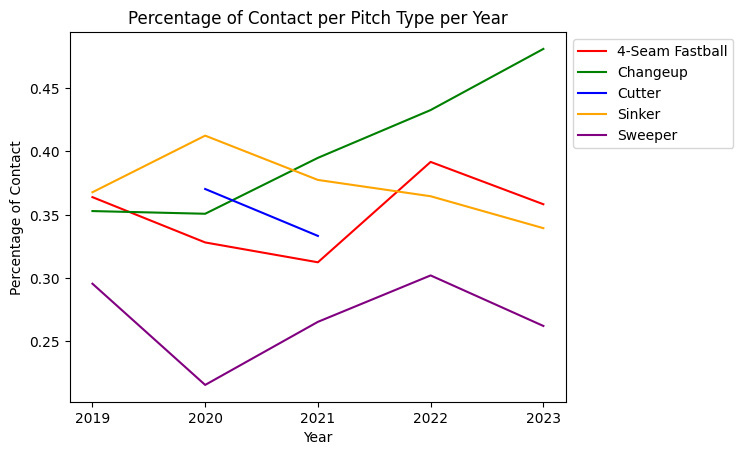

In [52]:
plt.plot(contact_per_pitch_type_per_year)
plt.xticks(np.arange(2019, 2024), np.arange(2019, 2024))
plt.xlabel('Year')
plt.ylabel('Percentage of Contact')
plt.title('Percentage of Contact per Pitch Type per Year')
# apply color to the plot
for i, pitch in enumerate(contact_per_pitch_type_per_year.columns):
    plt.gca().get_lines()[i].set_color(pitch_color_map[pitch])
plt.legend(contact_per_pitch_type_per_year.columns, bbox_to_anchor=(1, 1))
plt.show()

### Pitch Locations

In [13]:
def draw_strike_zone(sz_top=3.5, sz_bot=1.5, ls='k-'):
    plt.plot([-0.708, 0.708], [sz_bot,sz_bot], ls)
    plt.plot([-0.708, -0.708], [sz_bot,sz_top], ls)
    plt.plot([0.708, 0.708], [sz_bot,sz_top], ls)
    plt.plot([-0.708, 0.708], [sz_top,sz_top], ls) 

    return

In [14]:
def draw_home_plate(ls='k-'):
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,-0.3], ls)
    plt.plot([0.708, 0.708], [0,-0.3], ls)
    plt.plot([-0.708, 0], [-0.3, -0.6], ls)
    plt.plot([0.708, 0], [-0.3, -0.6], ls)

    return

In [66]:
def plot_pitch_locations(year):
    sns.scatterplot(data=lw[lw['game_year']==year], x='plate_x', y='plate_z', hue='pitch_name', alpha=0.5, palette=pitch_color_map)
    
    # x and y limits
    plt.xlim(-4, 4)
    plt.ylim(-1, 6)

    # remove x and y labels
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    
    plt.title(f'{year} Pitch Locations')
    plt.show()

    return

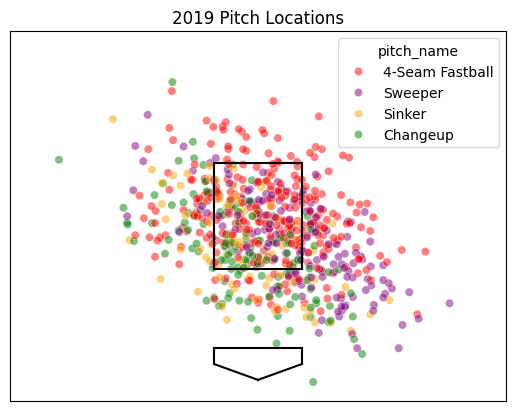

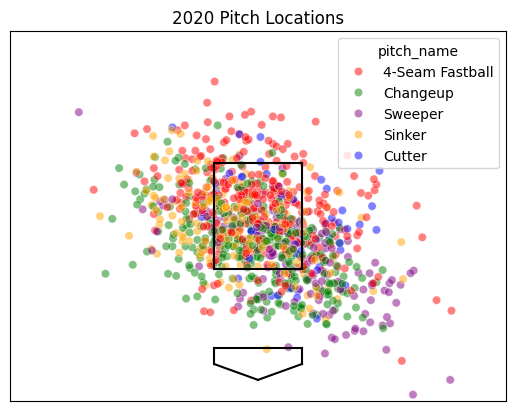

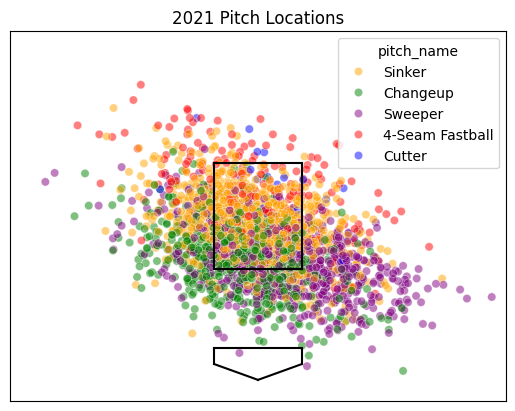

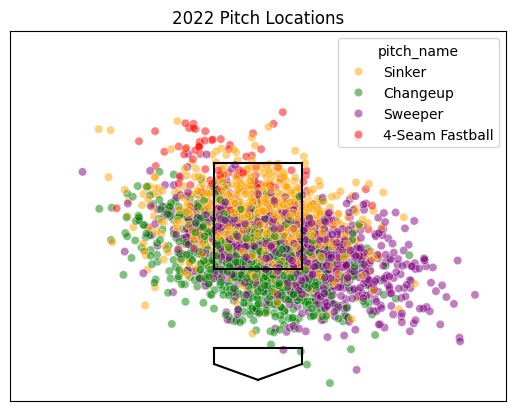

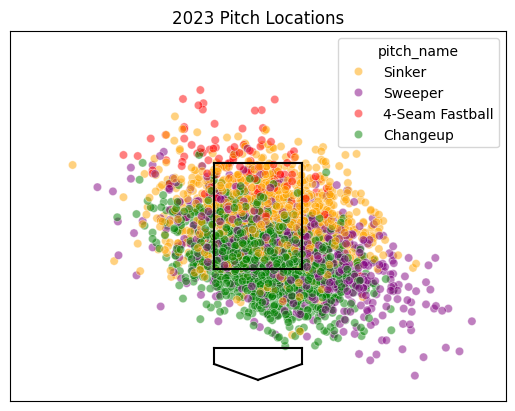

In [67]:
for year in np.arange(2019, 2024):
    draw_strike_zone()
    draw_home_plate()
    plot_pitch_locations(year)

In [68]:
def calc_release_average_distance_from_center(year):
    lw_year = lw[lw['game_year']==year][['release_pos_x', 'release_pos_z']]

    return np.mean(np.sqrt(lw_year['release_pos_x']**2 + (lw_year['release_pos_z'] - 2.5)**2))

In [103]:
def plot_release_position(year):
    sns.scatterplot(data=lw[lw['game_year']==year], x='release_pos_x', y='release_pos_z', hue='pitch_name', alpha=0.5, palette=pitch_color_map)
    
    # x and y limits
    plt.xlim(-4, 4)
    plt.ylim(-1, 6)

    # remove x and y labels
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)

    plt.legend(loc = 'lower right')
    plt.title(f'{year} Release Positions')

    plt.annotate(f'Average Distance from Center: {calc_release_average_distance_from_center(year):.2f} ft', xy=(-0.32, 5.5))

    plt.show()

    return

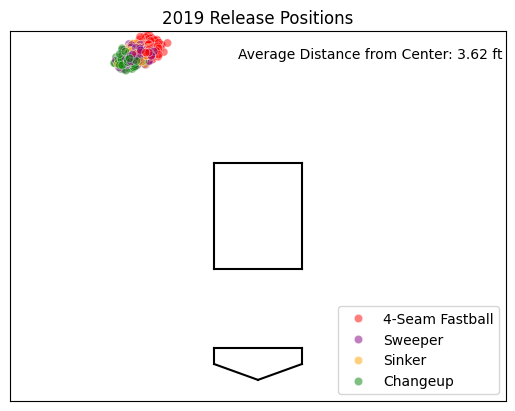

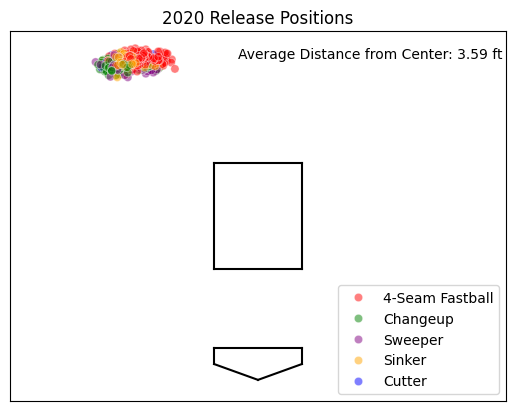

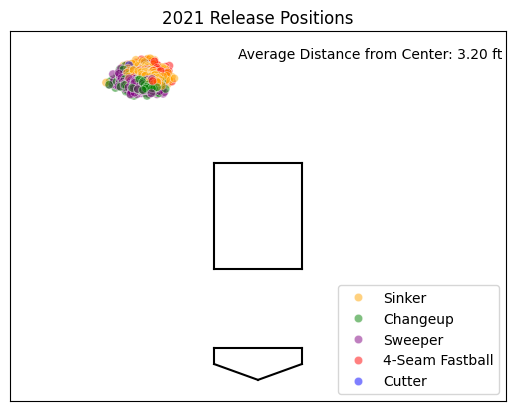

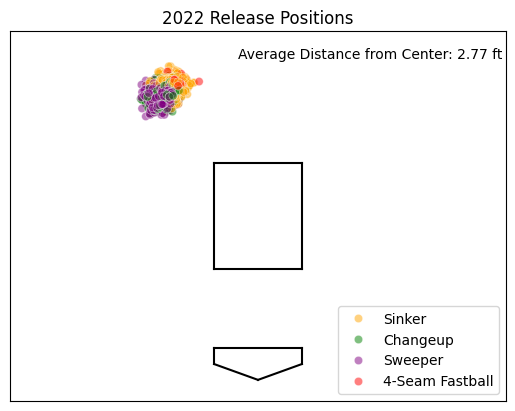

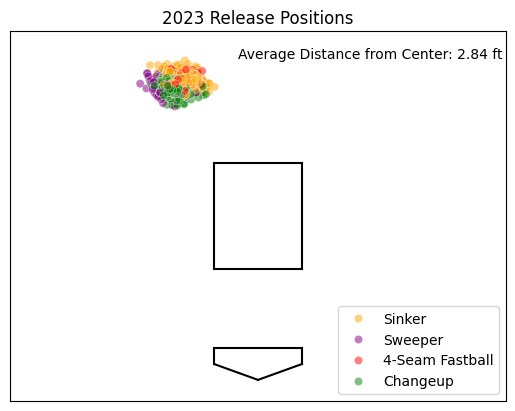

In [104]:
for year in np.arange(2019, 2024):
    draw_strike_zone()
    draw_home_plate()
    plot_release_position(year)

In [59]:
def plot_pitch_location_contour(year, pitch):
    draw_strike_zone()
    draw_home_plate()
    sns.kdeplot(data=lw[(lw['game_year']==year) & (lw['pitch_name']==pitch)], x='plate_x', y='plate_z', cmap='vlag', fill=True, bw_adjust=0.5)
    # remove x and y labels
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title(f'{year} {pitch}')
    plt.xlim(-5, 5)
    plt.ylim(-1, 5.5)
    plt.show()

    return

### Changeup

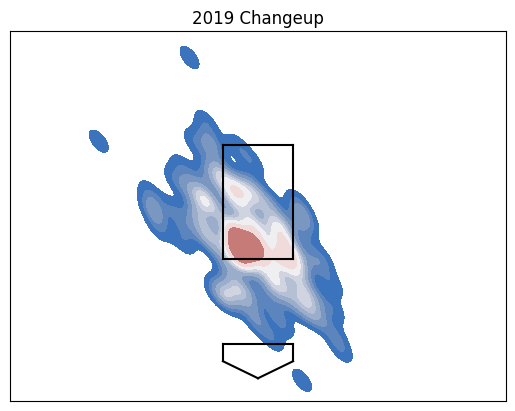

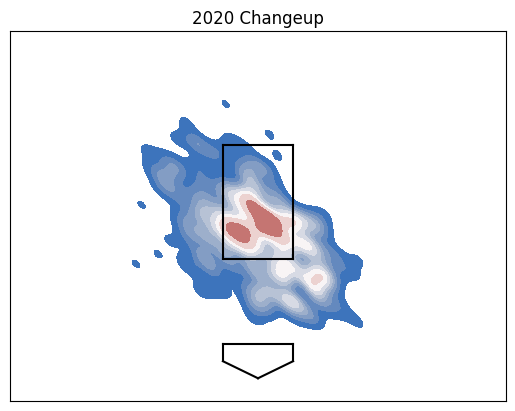

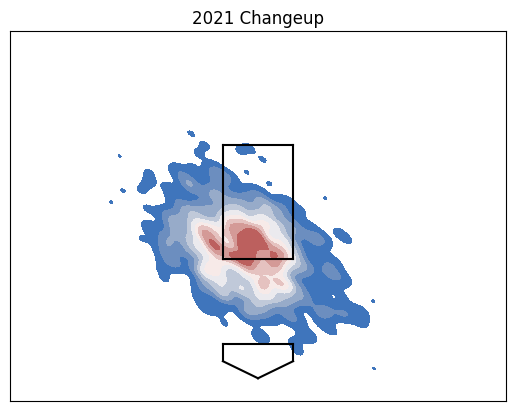

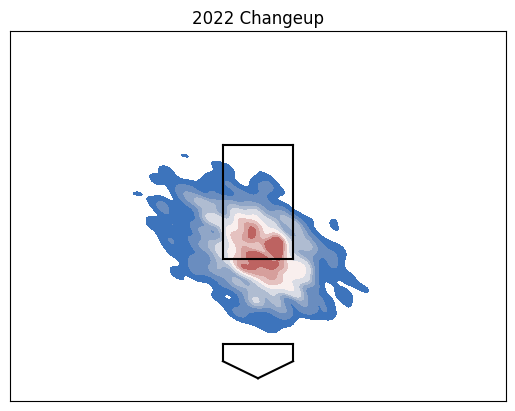

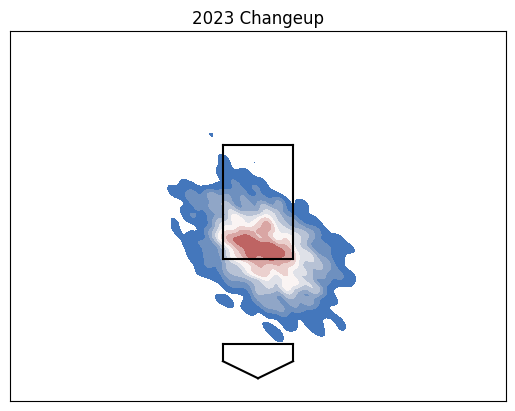

In [60]:
for year in np.arange(2019, 2024):
    plot_pitch_location_contour(year, 'Changeup')

### Sweeper

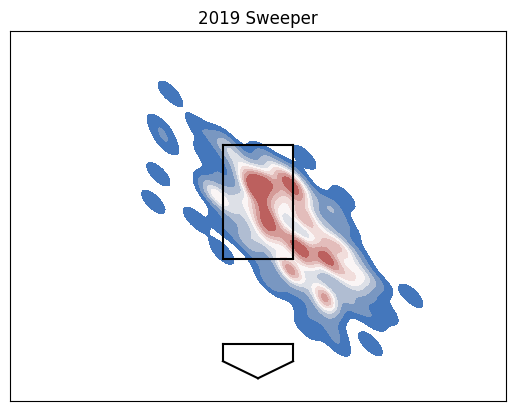

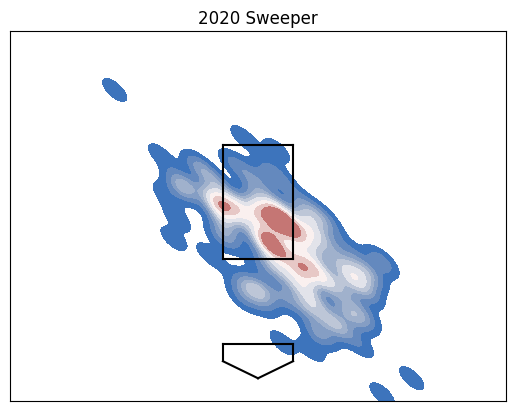

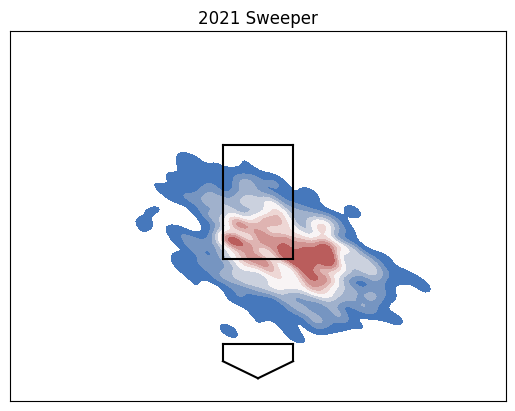

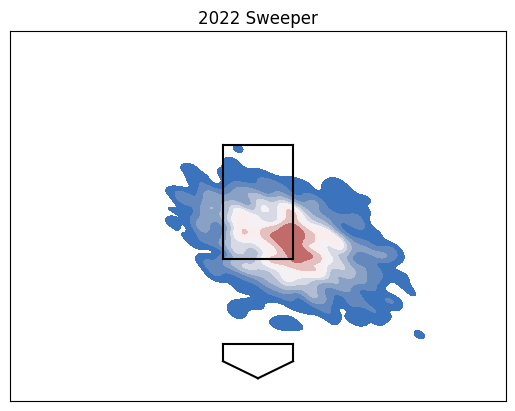

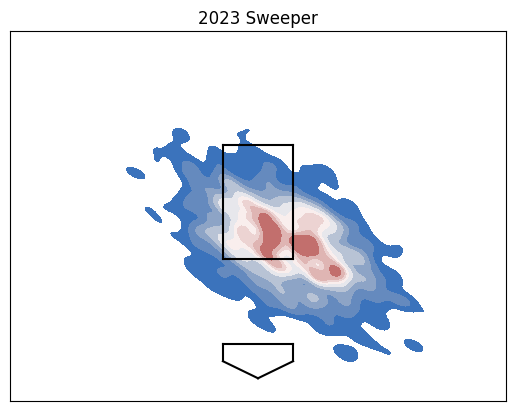

In [61]:
for year in np.arange(2019, 2024):
    plot_pitch_location_contour(year, 'Sweeper')

### Sinker

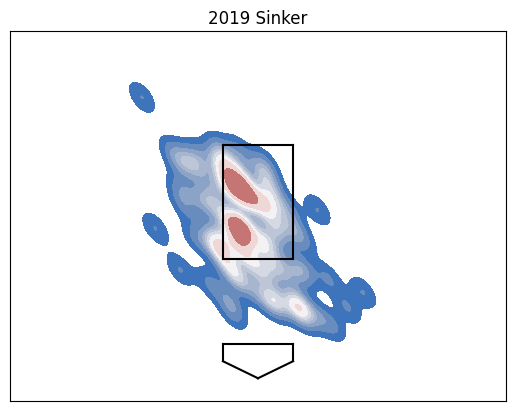

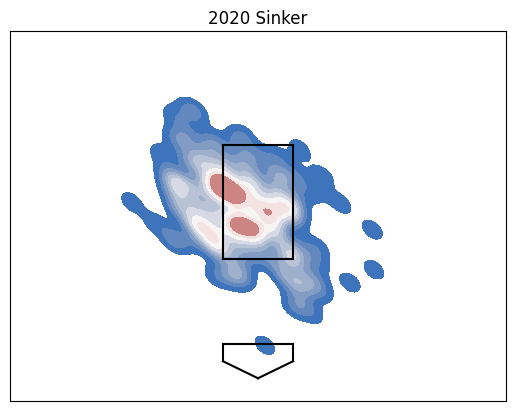

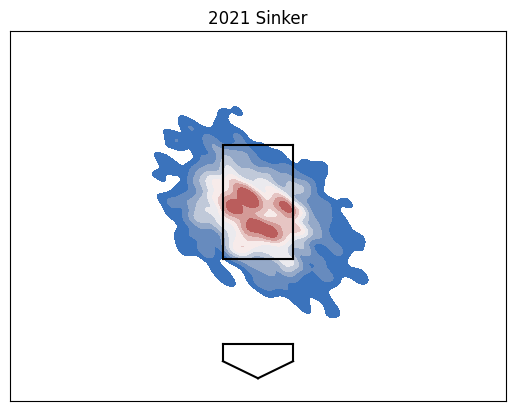

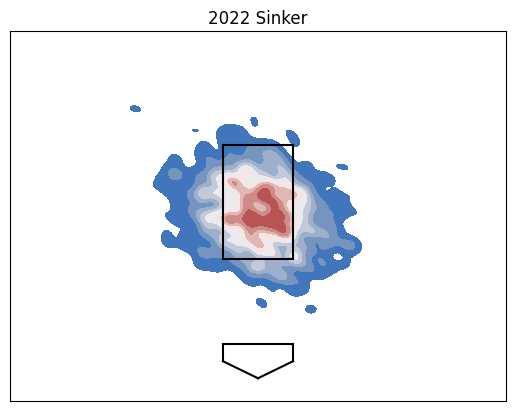

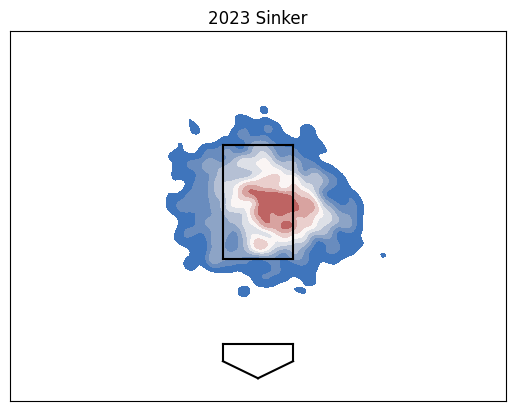

In [62]:
for year in np.arange(2019, 2024):
    plot_pitch_location_contour(year, 'Sinker')

### 4-Seam Fastball

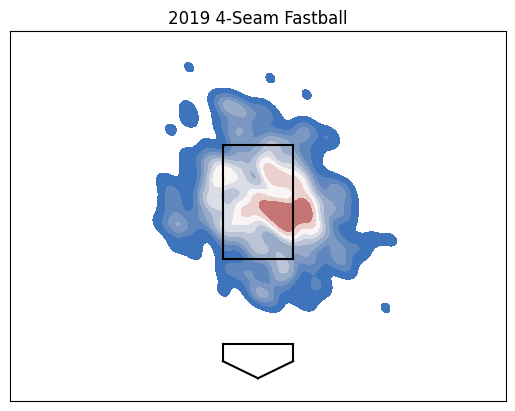

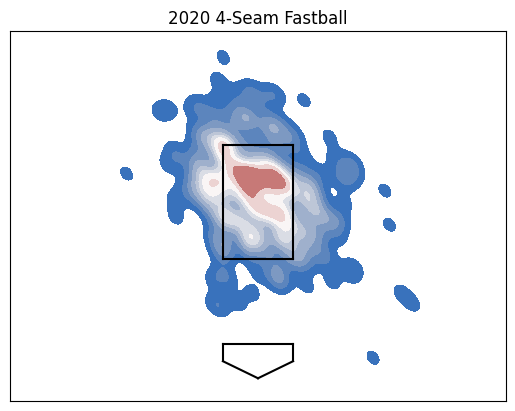

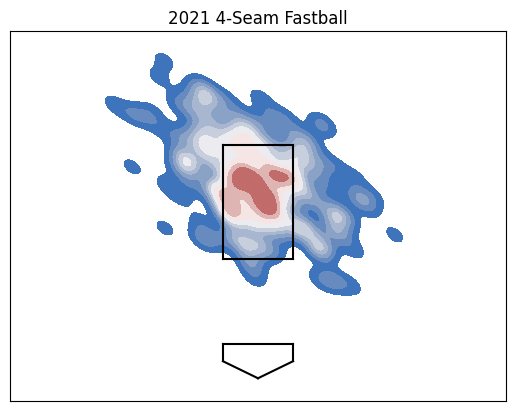

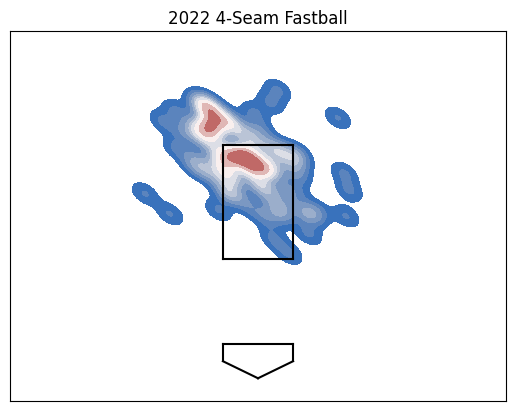

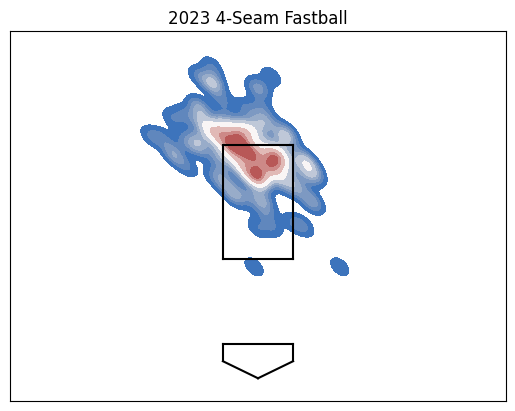

In [63]:
for year in np.arange(2019, 2024):
    plot_pitch_location_contour(year, '4-Seam Fastball')

### Pitch Movement

In [126]:
def plot_pitch_movement(pitch):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'{pitch} Movement per Year')

    sns.boxplot(data=lw[lw['pitch_name']==pitch], x='game_year', y='pfx_x', ax=ax[0], hue='game_year', palette='viridis')
    ax[0].set_ylabel('Horizontal Movement (ft)')
    ax[0].set_xlabel('Year')
    ax[0].get_legend().remove()



    sns.boxplot(data=lw[lw['pitch_name']==pitch], x='game_year', y='pfx_z', ax=ax[1], hue='game_year', palette='viridis')
    ax[1].set_ylabel('Vertical Movement (ft)')
    ax[1].set_xlabel('Year')
    ax[1].get_legend().remove()

    plt.show()

    return

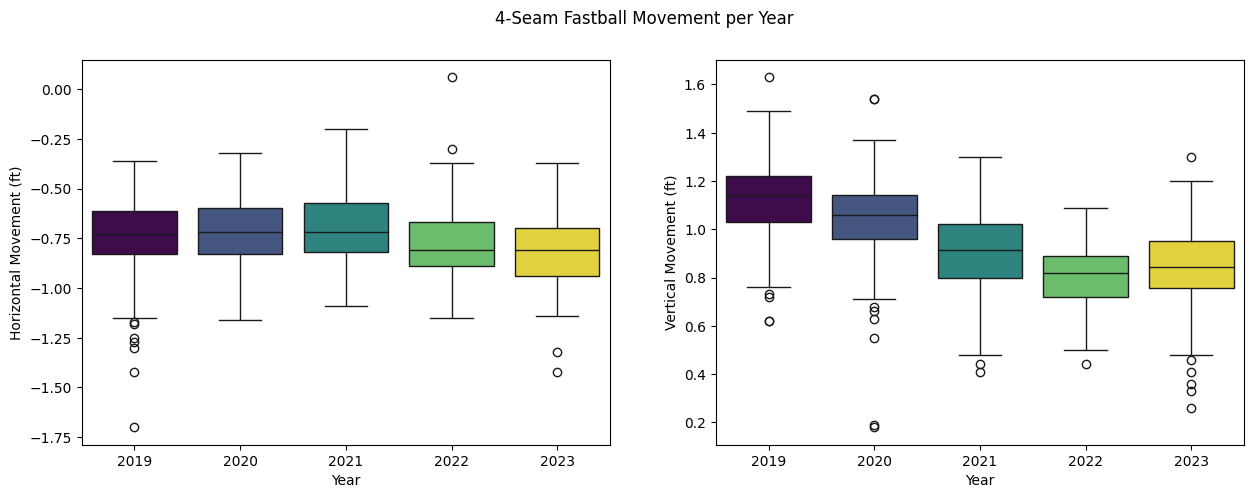

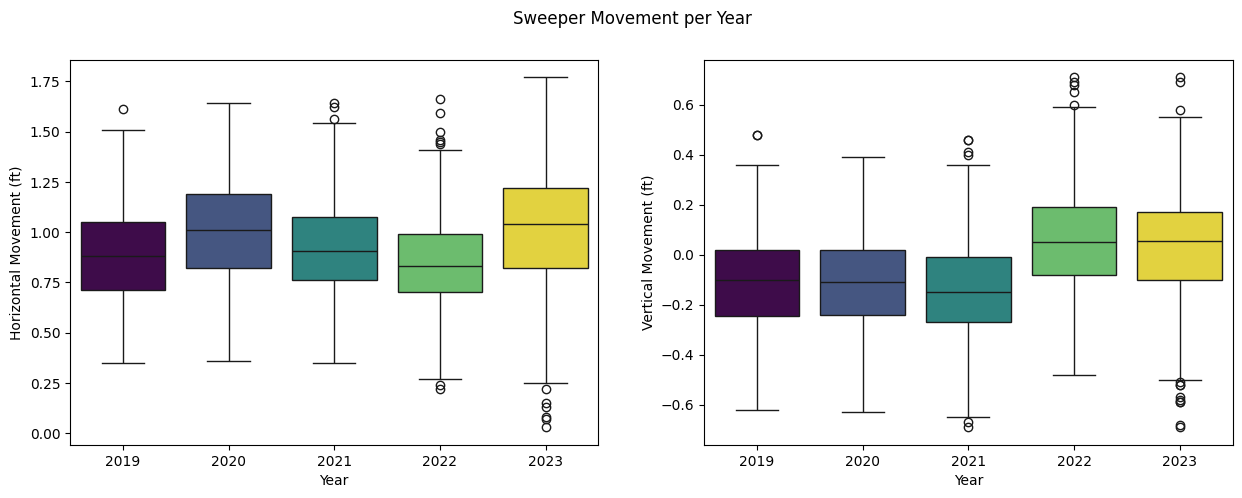

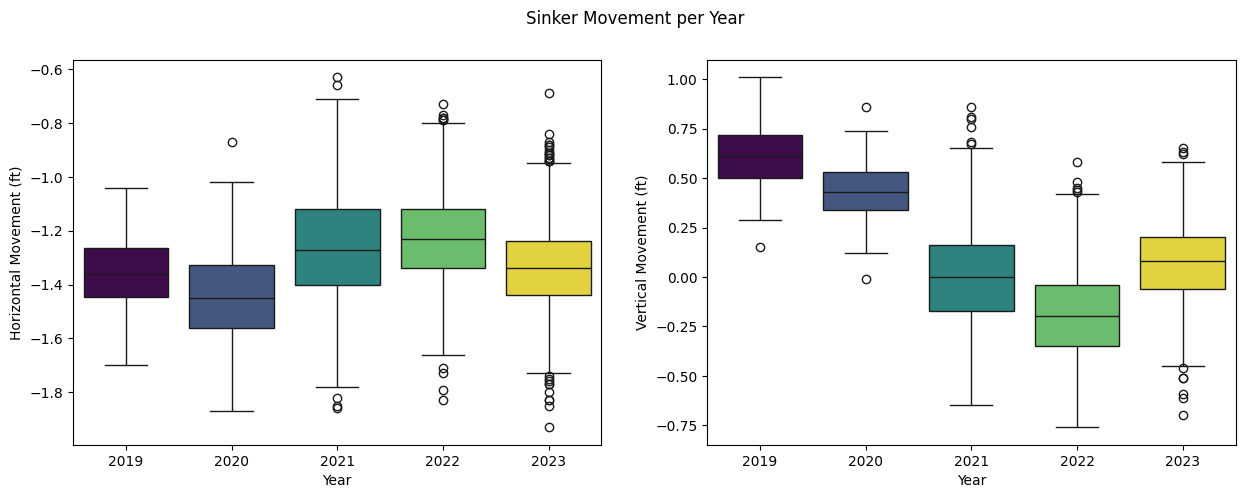

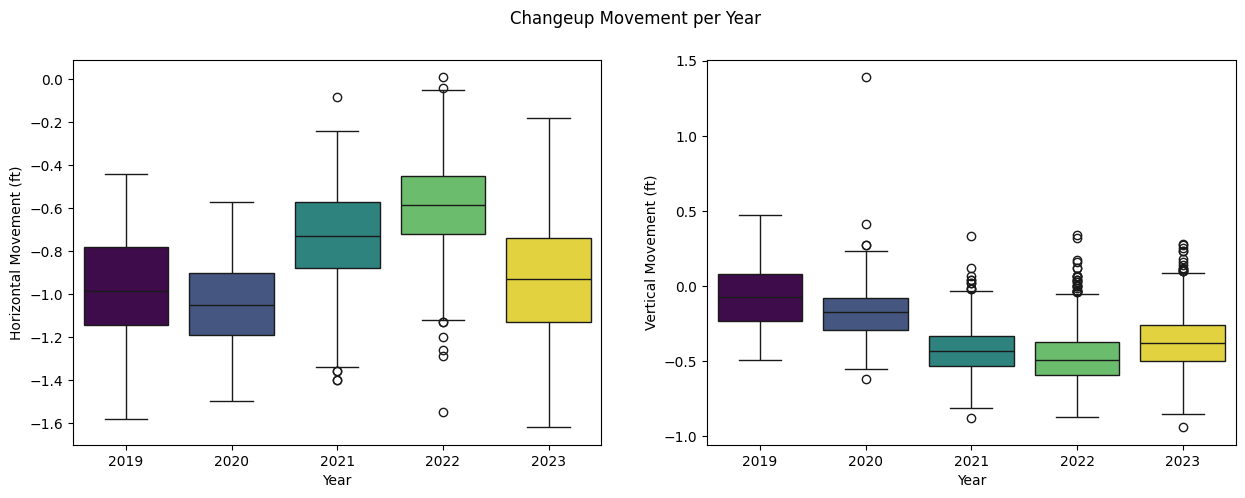

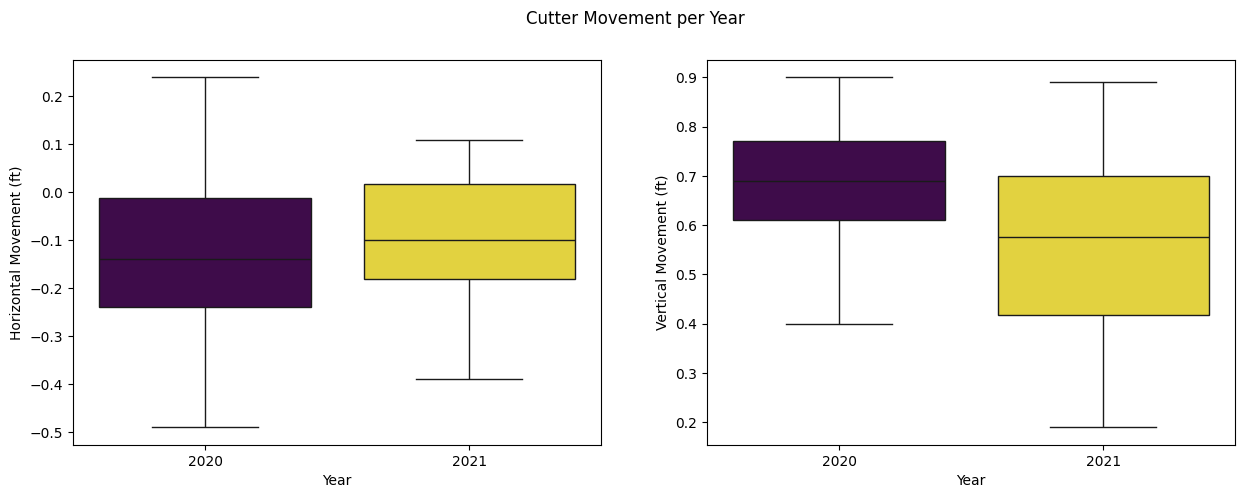

In [127]:
for pitch in lw['pitch_name'].unique():
    plot_pitch_movement(pitch)